In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [7]:
iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

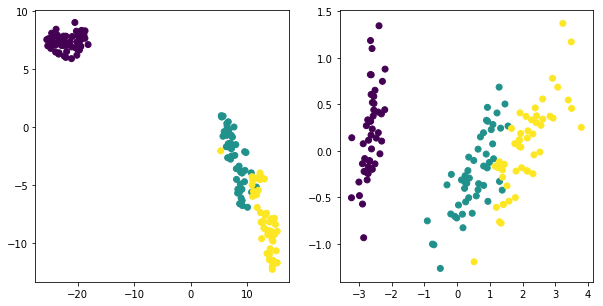

In [8]:
figure(figsize=(10, 5))
subplot(121)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
subplot(122)
scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

In [9]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer


In [10]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset="train", categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)


In [11]:
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.000s...
[t-SNE] Computed neighbors for 2034 samples in 0.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107856
[t-SNE] Computed conditional probabilities in 0.154s
[t-SNE] Iteration 50: error = 74.3164597, gradient norm = 0.0996888 (50 iterations in 6.030s)
[t-SNE] Iteration 100: error = 73.4326553, gradient norm = 0.1081191 (50 iterations in 5.205s)
[t-SNE] Iteration 150: error = 73.3098450, gradient norm = 0.1155710 (50 iterations in 4.644s)
[t-SNE] Iteration 200: error = 73.5602112, gradient norm = 0.1205112 (50 iterations in 4.995s)
[t-SNE] Iteration 250: error = 73.5650024, gradient norm = 0.0984483 (50 iterations in 4.585s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.565002
[t-SNE] Iteration 300: err

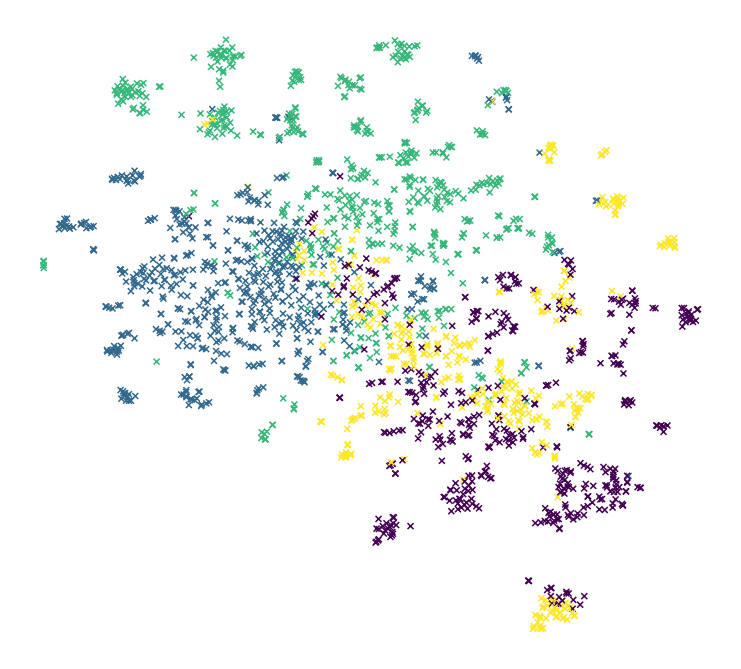

In [12]:
fig = figure(figsize=(10, 10))
ax = axes(frameon=False)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=newsgroups.target, marker="x")

In [13]:
from sklearn.datasets import fetch_mldata

# Load MNIST dataset
mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255.0, mnist.target

In [14]:
# Create subset and reduce to first 50 dimensions
indices = arange(X.shape[0])
random.shuffle(indices)
n_train_samples = 5000
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]


In [15]:
def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    title("\\textbf{MNIST dataset} -- Two-dimensional "
          "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.022s...
[t-SNE] Computed neighbors for 5000 samples in 3.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.093910
[t-SNE] Computed conditional probabilities in 0.323s
[t-SNE] Iteration 50: error = 85.9220352, gradient norm = 0.0008085 (50 iterations in 12.659s)
[t-SNE] Iteration 100: error = 80.9568176, gradient norm = 0.0067771 (50 iterations in 15.414s)
[t-SNE] Iteration 150: error = 80.3640976, gradient norm = 0.0005152 (50 iterations in 12.136s)
[t-SNE] Iteration 200: error = 80.3302460, gradient norm = 0.0003267 (50 iterations in 13.382s)
[t-SNE] Iteration 250: error = 80.3223190, gradient norm = 0.00

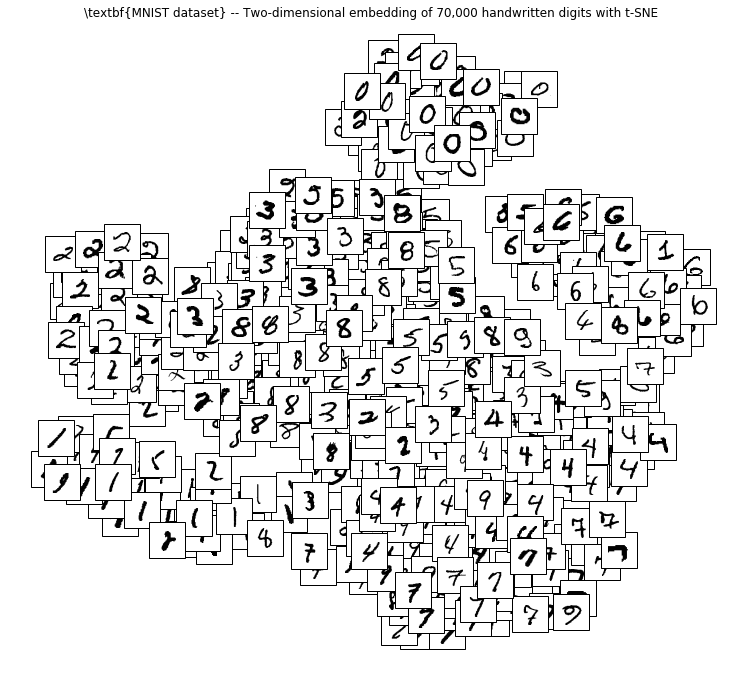

In [16]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)           
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded,
           "t-SNE", min_dist=10.0)            


In [18]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [19]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

In [20]:
rndperm = np.random.permutation(df.shape[0])

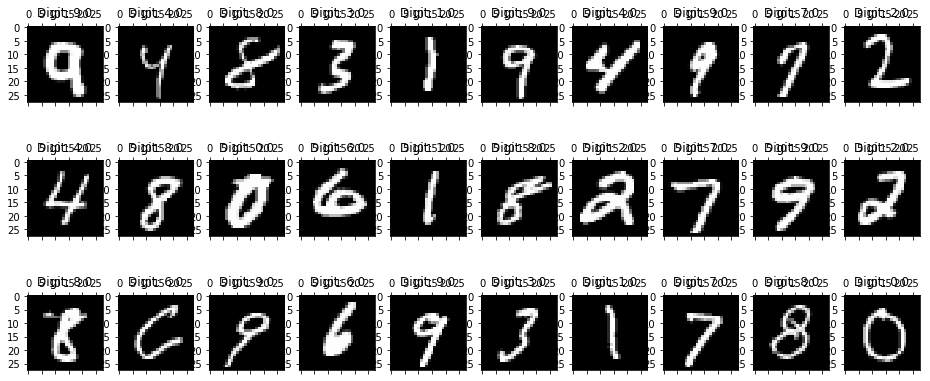

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()